British Airways Task 2: Building a Predictive model to understand factors that influence buying behavior

In [6]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

# Task 2: Explore and Prepare the Dataset

In this task, we will explore the dataset and prepare it for training a machine learning model.

## Step 1: Load and Preprocess the Data

```python
# Load and preprocess the data here


In [25]:
#data= '/customer_booking.csv'
data= '/Users/user/Downloads/customer_booking.csv'

In [26]:
!pip install chardet

import chardet

with open('c:/Users/user/Downloads/customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)
#!pip install cchardet

#import cchardet as chardet

#with open('/customer_booking.csv', 'rb') as rawdata:
    #result = chardet.detect(rawdata.read(100000))

#print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


# Explore the dataset here

In [27]:
df= pd.read_csv(data, encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Exploratory Data Analysis

In [33]:
# Explore the dataset

# Check data types
data_types = df.dtypes

# Get the shape of the dataset
data_shape = df.shape

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Count unique values in the 'booking_complete' column
booking_complete_counts = df['booking_complete'].value_counts()


# Perform feature selection here
# ...


In [34]:
# Feature Engineering
# Create new features or transformations

# Split the data into features and target
  
# Drop the target variable and store it in 'y'
y = df['booking_complete'] # Target variable

# Drop the target variable column from the feature set 'X'
X = df.drop('booking_complete', axis=1) # Features

# Factorize object-type columns to convert them to integer format
for colname in X.select_dtypes(include=['object']):
    X[colname] = X[colname].factorize()[0]



In [35]:
#Display datatype
X.dtypes


num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [40]:
!pip install sklearn
!pip install scikit-learn


from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute MI scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store the MI scores with column names
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the features by MI score in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the top features and their MI scores
print(mi_scores_df.head())


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 640.0 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.1 kB 640.0 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.1 kB 640.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.1 kB 260.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.1 kB 260.9 kB/s eta 0:00:01
     --------------------

Computing Mutual Information (MI) Scores and Visualization

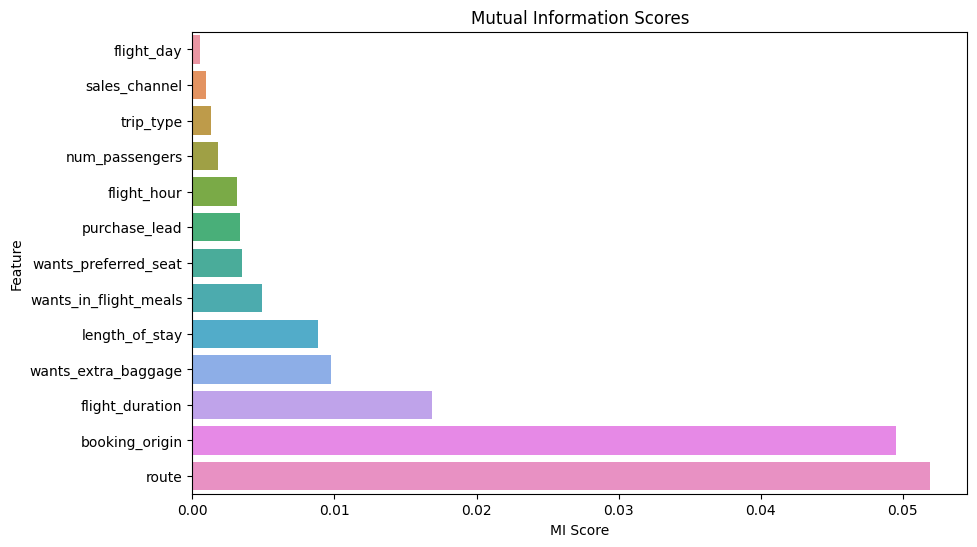

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mi_scores(scores, feature_names):
    # Sort the scores and feature names in descending order
    scores, feature_names = zip(*sorted(zip(scores, feature_names), reverse=True))
    
    # Create a DataFrame from the sorted scores and feature names
    mi_df = pd.DataFrame({'Feature': feature_names, 'MI Score': scores})
    
    # Create a horizontal bar plot using Seaborn with reversed feature axis
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MI Score', y='Feature', data=mi_df[::-1], orient='h')  # Use [::-1] to reverse the feature order
    
    # Set plot title and labels
    plt.title('Mutual Information Scores')
    plt.xlabel('MI Score')
    plt.ylabel('Feature')
    
    # Show the plot
    plt.show()

# Call the function to plot MI scores using Seaborn with reversed feature axis
plot_mi_scores(mi_scores, X.columns)


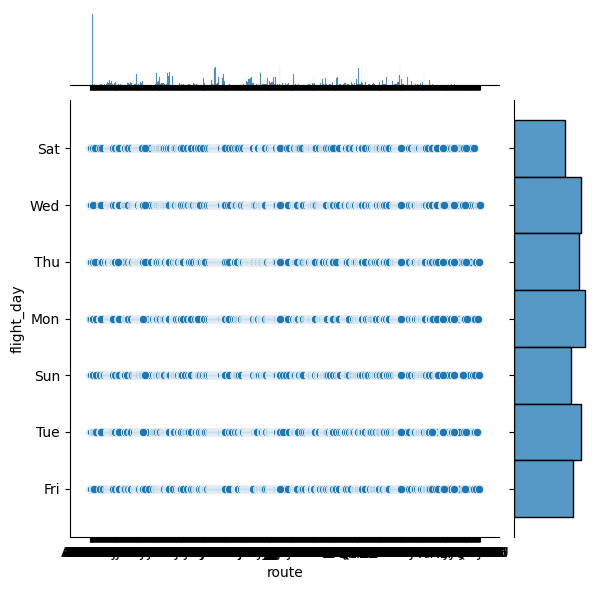

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a joint plot between 'route' and another variable
sns.jointplot(data=df, x='route', y='flight_day', kind='scatter')

# Show the plot
plt.show()


Train a Machine Learning Model
In this task, we will train a machine learning model to predict customer bookings.

Step 4: Model Training

In [10]:
from sklearn.model_selection import train_test_split

def dataset_split(X, y, random_state=0):
    # Split the dataset into train, validation, and test sets
    train_full_X, test_X, train_full_y, test_y = train_test_split(X, y, test_size=0.25, random_state=random_state)
    train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.2, random_state=random_state)
    
    return train_X, val_X, test_X, train_y, val_y, test_y

# Call the function to split your dataset
#train_X, val_X, test_X, train_y, val_y, test_y = dataset_split(X, y, random_state=0)


Step 5: Model Evaluation

In [16]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    return scaled_X

# Apply scaling to your training, validation, and test sets
#train_X_scaled = scale(train_X)
#val_X_scaled = scale(val_X)
#test_X_scaled = scale(test_X)



Finalize Model and Evaluation
In this task, we will finalize the model, evaluate its performance, and provide findings.


Model 1: Random model classifier for top 5 features


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Specify the encoding when reading the CSV file
df = pd.read_csv('c:/Users/user/Downloads/customer_booking.csv', encoding='ISO-8859-1')

#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.26
AUC score:  0.5554167016137819


Model 2: Random model classifier for all features


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# Function to load and preprocess the dataset
def load_and_preprocess_data(file_path):
    # Load the dataset with the specified encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Define the target variable and features
    y = df['booking_complete']
    X = df.drop('booking_complete', axis=1)

    # Perform one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Scale the features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X, y

# Function to train and evaluate the model
def train_and_evaluate_model(X, y):
    # Split the dataset into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

    # Initialize and train the model
    forest_model = RandomForestClassifier(random_state=1)
    forest_model.fit(X_train, y_train)

    # Make predictions on the validation set
    preds = forest_model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, preds) * 100
    auc_score = roc_auc_score(y_val, preds)

    return accuracy, auc_score

# Main code
if __name__ == "__main__":
    file_path = 'c:/Users/user/Downloads/customer_booking.csv'
    X, y = load_and_preprocess_data(file_path)
    accuracy, auc_score = train_and_evaluate_model(X, y)
    
    print('ACCURACY:', accuracy)
    print('AUC score:', auc_score)


ACCURACY: 85.26
AUC score: 0.5591983889684704


Model 3: Decision Tree Classifier for top 5 features

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Define your features
features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay']

# Extract the features and target variable
X = df[features]
y = df['booking_complete']

# Perform one-hot encoding
X = pd.get_dummies(X, columns=features)
X = scale(X)

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = dataset(X, y)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
prediction_decision_tree = decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, prediction_decision_tree) * 100
auc_score = roc_auc_score(y_val, prediction_decision_tree)

print('ACCURACY:', accuracy)
print('AUC score:', auc_score)


ACCURACY: 82.67999999999999
AUC score: 0.5547152672595722


Model 4: Decision Tree Classifier For all features

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Extract the target variable
y = df['booking_complete']

# Drop the target variable column from the feature set 'X'
X = df.drop('booking_complete', axis=1)

# Perform one-hot encoding
X = pd.get_dummies(X)

# Scale the features
X = scale(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = dataset(X, y)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
preds = decision_tree_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, preds) * 100
auc_score = roc_auc_score(y_val, preds)

print('ACCURACY:', accuracy)
print('AUC score:', auc_score)


ACCURACY: 79.10000000000001
AUC score: 0.5876637578985348


Model 5: XGB classifier with top 5 features

In [27]:
!pip install xgboost


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Define your features
features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay']

# Extract the features and target variable
X = df[features]
y = df['booking_complete']

# Perform one-hot encoding
X = pd.get_dummies(X, columns=features)
X = scale(X)

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = dataset(X, y)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
prediction_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, prediction_xgb) * 100
auc_score = roc_auc_score(y_val, prediction_xgb)

print('ACCURACY:', accuracy)
print('AUC score:', auc_score)


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 330.3 kB/s eta 0:03:35
   ---------------------------------------- 0.0/70.9 MB 330.3 kB/s eta 0:03:35
   ---------------------------------------- 0.1/70.9 MB 297.7 kB/s eta 0:03:59
   ---------------------------------------- 0.1/70.9 MB 374.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/70.9 MB 374.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/70.9 MB 374.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/70.9 MB 343.4 kB/s eta 0:03:27
   ---------------------------------------- 0.1/70.9 MB 370.8 kB/s eta 0:03:11
   --------------------

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


ACCURACY: 84.69
AUC score: 0.5214786722136596


Model 6: XGB Classifier for all features

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Extract the features and target variable
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Perform one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X = scale(X)

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = dataset(X, y)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
prediction_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, prediction_xgb) * 100
auc_score = roc_auc_score(y_val, prediction_xgb)

print('ACCURACY:', accuracy)
print('AUC score:', auc_score)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


ACCURACY: 85.05
AUC score: 0.5417937904486089


Finalizing random forest model with all features as final model, as it has good accuracy and higher auc score compared to other models

Validating with test data set

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming you have already defined and preprocessed your dataset as X_train, X_val, y_train, X_test, y_test

# Initialize and train the Random Forest model with all features
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model with test data
accuracy = accuracy_score(y_test, predictions) * 100
auc_score = roc_auc_score(y_test, predictions)

print('Test Set Accuracy:', accuracy)
print('Test Set AUC score:', auc_score)


Test Set Accuracy: 85.36
Test Set AUC score: 0.5542570739753839
